In [ ]:
#khai báo thư viện cần thiết
import pandas as pd
import numpy as np
%matplotlib inline
!pip install pmdarima

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.0 MB/s eta 0:00:00


In [ ]:
# đọc file csv và chia dữ liệu theo tỷ lệ 7:2:1
df = pd.read_csv('XRP-USD.csv')
df = df[['Date', 'Close']]

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

train_data

,Date,Close
0,2018-06-15,0.537707
1,2018-06-16,0.534784
2,2018-06-17,0.528216
3,2018-06-18,0.537495
4,2018-06-19,0.549621
...,...,...
1091,2021-06-10,0.869182
1092,2021-06-11,0.848450
1093,2021-06-12,0.832683
1094,2021-06-13,0.883160


In [ ]:
# training dữ liệu
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
# Tìm model phù hợp nhất và fit model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3914.512, Time=3.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3914.724, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3917.274, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3916.839, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3916.653, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3918.022, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3916.245, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3916.533, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3917.421, Time=0.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3914.291, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-3919.948, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3919.194, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-3918.173, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3918.464, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo dự đoán 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+29, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+30)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.89483603 0.89520635 0.89528106 0.89529509 0.89529798 0.89529851
 0.89529862 0.89529864 0.89529865 0.89529865 0.89529865 0.89529865
 0.89529865 0.89529865 0.89529865 0.89529865 0.89529865 0.89529865
 0.89529865 0.89529865 0.89529865 0.89529865 0.89529865 0.89529865
 0.89529865 0.89529865 0.89529865 0.89529865 0.89529865]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
test_mae = mean_absolute_error(y_pred, ytest)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = mean_absolute_percentage_error(y_pred, ytest)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_pred_val, yval)
val_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
val_mape = mean_absolute_percentage_error(y_pred_val, yval)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Validation RMSE: 0.49049890781124045
Testing RMSE: 0.24567700255859212


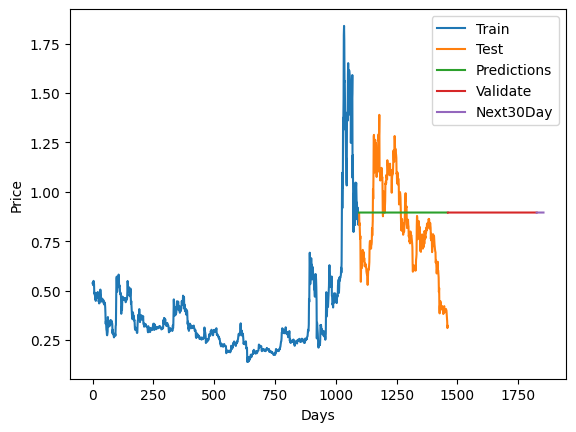

In [ ]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()